In [1]:
from save_csv import results_to_csv
import scipy.io as sio
import numpy as np
import random as sample
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt  
%matplotlib inline

## 2. Data Partitioning

In [2]:
# PART A
mnist_contents = sio.loadmat('data\mnist_data.mat')
mnist_train = mnist_contents['training_data']
mnist_labels = mnist_contents['training_labels']
mnist_m = mnist_train.shape[0]
mnist_n = mnist_train.shape[1]
mnist_df = pd.DataFrame(data=mnist_train,index=list(range(mnist_m)),columns=list(range(mnist_n)))
mnist_df['labels'] = mnist_labels
mnist_train_df, mnist_val_df = train_test_split(mnist_df,test_size=1/6, shuffle=False)

In [3]:
# PART B
spam_contents = sio.loadmat('data\spam_data.mat')
spam_train = spam_contents['training_data']
spam_labels = spam_contents['training_labels']
spam_m = spam_train.shape[0]
spam_n = spam_train.shape[1]
spam_df = pd.DataFrame(data=spam_train,index=list(range(spam_m)),columns=list(range(spam_n)))
spam_df['labels'] = spam_labels
spam_train_df, spam_val_df = train_test_split(spam_df,test_size=.2, shuffle=False)

In [4]:
# PART C
cifar_contents = sio.loadmat('data\cifar10_data.mat')
cifar_train = cifar_contents['training_data']
cifar_labels = cifar_contents['training_labels']
cifar_m = cifar_train.shape[0]
cifar_n = cifar_train.shape[1]
cifar_df = pd.DataFrame(data=cifar_train,index=list(range(cifar_m)),columns=list(range(cifar_n)))
cifar_df['labels'] = cifar_labels
cifar_df = cifar_df.sample(frac=1, random_state=1)
cifar_train_df, cifar_val_df = train_test_split(cifar_df,test_size=.1, shuffle=False)

## 3. Support Vector Machines: Coding

In [6]:
# PART A
mnist_train_labels = mnist_train_df['labels']
mnist_train_images = mnist_train_df.drop(axis=1,labels='labels')
mnist_val_labels = mnist_val_df['labels']
mnist_val_images = mnist_val_df.drop(axis=1,labels='labels')

In [7]:
mnist_train_err = []
mnist_val_err = []
sizes = [100,200,500,1000,2000,5000,10000]
prev_size = 0
for size in sizes:
    clf = SVC(kernel='linear')
    images = mnist_train_images[prev_size:prev_size + size]
    labels = mnist_train_labels[prev_size:prev_size + size]
    clf.fit(images, labels)
    pred_labels_train = clf.predict(images)
    mnist_train_err.append(1 - accuracy_score(labels, pred_labels_train))
    pred_labels_val = clf.predict(mnist_val_images)
    mnist_val_err.append(1 - accuracy_score(mnist_val_labels, pred_labels_val))
    prev_size += size

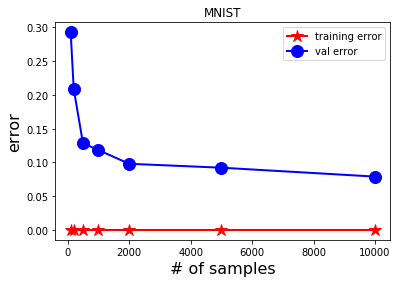

[0.29290000000000005, 0.2087, 0.12839999999999996, 0.11839999999999995, 0.09799999999999998, 0.09219999999999995, 0.07899999999999996]


In [8]:
plt.plot(sizes, mnist_train_err, 'r*-', linewidth=2, markersize=12, label='training error')
plt.plot(sizes, mnist_val_err, 'bo-', linewidth=2, markersize=12, label='val error')
plt.gca().legend()
plt.xlabel('# of samples', fontsize=16)
plt.ylabel('error', fontsize=16)
plt.title('MNIST')
plt.show()
print(mnist_val_err)

In [9]:
# PART B
spam_train_df = spam_train_df.sample(frac=1)
spam_train_labels = spam_train_df['labels']
spam_train_images = spam_train_df.drop(axis=1,labels='labels')
spam_val_df = spam_val_df.sample(frac=1)
spam_val_labels = spam_val_df['labels']
spam_val_images = spam_val_df.drop(axis=1,labels='labels')

In [10]:
spam_train_err = []
spam_val_err = []
sizes = [100,200,500,1000,2000,spam_m]
prev_size = 0
for size in sizes:
    clf = SVC(kernel='linear',C=10)
    images = spam_train_images[prev_size:prev_size + size]
    labels = spam_train_labels[prev_size:prev_size + size]
    clf.fit(images, labels)
    pred_labels_train = clf.predict(images)
    spam_train_err.append(1 - accuracy_score(labels, pred_labels_train))
    pred_labels_val = clf.predict(spam_val_images)
    spam_val_err.append(1 - accuracy_score(spam_val_labels, pred_labels_val))
    prev_size += size

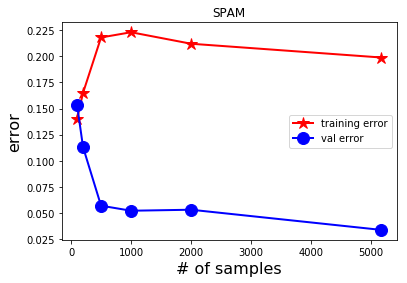

0.8463768115942029


In [11]:
plt.plot(sizes, spam_train_err, 'r*-', linewidth=2, markersize=12, label='training error')
plt.plot(sizes, spam_val_err, 'bo-', linewidth=2, markersize=12, label='val error')
plt.gca().legend()
plt.xlabel('# of samples', fontsize=16)
plt.ylabel('error', fontsize=16)
plt.title('SPAM')
plt.show()
print(1-spam_val_err[0])

In [12]:
# PART C
cifar_train_labels = cifar_train_df['labels']
cifar_train_images = cifar_train_df.drop(axis=1,labels='labels')
cifar_val_labels = cifar_val_df['labels']
cifar_val_images = cifar_val_df.drop(axis=1,labels='labels')

In [14]:
cifar_train_err = []
cifar_val_err = []
sizes = [100,200,500,1000,2000,5000]
prev_size = 0
for size in sizes:
    clf = SVC(kernel='linear')
    images = cifar_train_images[prev_size:prev_size + size]
    labels = cifar_train_labels[prev_size:prev_size + size]
    clf.fit(images, labels)
    pred_labels_train = clf.predict(images)
    cifar_train_err.append(1 - accuracy_score(labels, pred_labels_train))
    pred_labels_val = clf.predict(cifar_val_images)
    cifar_val_err.append(1 - accuracy_score(cifar_val_labels, pred_labels_val))
    prev_size += size

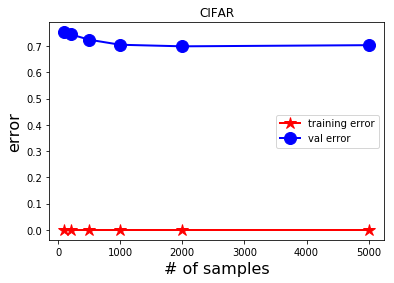

In [15]:
plt.plot(sizes, cifar_train_err, 'r*-', linewidth=2, markersize=12, label='training error')
plt.plot(sizes, cifar_val_err, 'bo-', linewidth=2, markersize=12, label='val error')
plt.gca().legend()
plt.xlabel('# of samples', fontsize=16)
plt.ylabel('error', fontsize=16)
plt.title('CIFAR')
plt.show()

## 4. Hyperparameter Tuning

For determining a good C value, I first started with C=1,10,20,... incrementing by some fixed amount. I found that changing the order of magnitude more effectively changed the accuracy with the SPAM data set. After testing values from 10^-8 to 10^7 with some delta multiplier, I found that this range from 10^-7 to ~7x10^-7 was ideal, and that my best C value was:3.9062499999999997e-07 

In [16]:
# PART A
mnist_train_labels = mnist_train_df['labels']
mnist_train_images = mnist_train_df.drop(axis=1,labels='labels')
mnist_val_labels = mnist_val_df['labels']
mnist_val_images = mnist_val_df.drop(axis=1,labels='labels')

In [17]:
c = .00000001
delta = 2.5
next_acc = 0
curr_acc = -1
x = []
y = []
while next_acc > curr_acc:
    x.append(c)
    y.append(next_acc)
    print('c value: ' + str(c))
    curr_acc = next_acc
    clf = SVC(kernel='linear',C=c)
    images = mnist_train_images[:10000]
    labels = mnist_train_labels[:10000]
    clf.fit(images, labels)
    pred_labels_val = clf.predict(mnist_val_images)
    next_acc = accuracy_score(mnist_val_labels, pred_labels_val)
    c *= delta
    print('curr accuracy: ' + str(curr_acc))
    print('next accuracy: ' + str(next_acc))

c value: 1e-08
curr accuracy: 0
next accuracy: 0.9007
c value: 2.5e-08
curr accuracy: 0.9007
next accuracy: 0.9142
c value: 6.25e-08
curr accuracy: 0.9142
next accuracy: 0.9245
c value: 1.5624999999999999e-07
curr accuracy: 0.9245
next accuracy: 0.9306
c value: 3.9062499999999997e-07
curr accuracy: 0.9306
next accuracy: 0.9356
c value: 9.765625e-07
curr accuracy: 0.9356
next accuracy: 0.9352


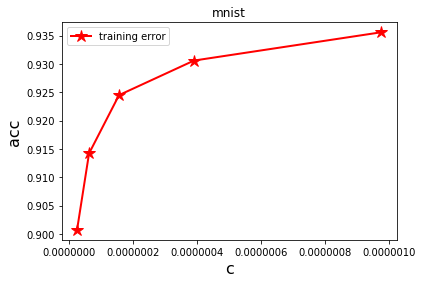

In [18]:
plt.plot(x[1:], y[1:], 'r*-', linewidth=2, markersize=12, label='training error')
plt.gca().legend()
plt.xlabel('c', fontsize=16)
plt.ylabel('acc', fontsize=16)
plt.title('mnist')
plt.show()

## 5. K-Fold Cross-Validation

Similarly to part 4, I empirically determined a range of C values that achieved the highest accuracy. I started by testing on a range from 10^-7 to 10^7 and found that those values in range 10^-2 to ~10^1 were best, with the most accuracy with C value as: 2.44140625 

In [19]:
# PART A
spam_train_k_df = spam_df

In [21]:
k = 5
c = .01
delta = 2.5
next_acc = 0
curr_acc = -1
x = []
y = []
chunk = spam_m//k
while next_acc > curr_acc:
    x.append(c)
    y.append(next_acc)
    print('c value: ' + str(c))
    curr_acc = next_acc
    accuracies = []
    spam_train_k_df = spam_train_k_df.sample(frac=1)
    for i in range(k):
        start = i * chunk
        end = start + chunk
        clf = SVC(kernel='linear',C=c)
        spam_train_k_labels = spam_train_k_df['labels'][:]
        spam_train_k_images = spam_train_k_df[:].drop(axis=1,labels='labels')
        spam_val_k_images = spam_train_k_images[start:end]
        spam_val_k_labels = spam_train_k_labels[start:end]
        spam_train_k_images = spam_train_k_images[:start].append(spam_train_k_images[end:])
        spam_train_k_labels = spam_train_k_labels[:start].append(spam_train_k_labels[end:])
        clf.fit(spam_train_k_images, spam_train_k_labels)
        pred_labels_val = clf.predict(spam_val_k_images)
        accuracies.append(accuracy_score(spam_val_k_labels, pred_labels_val))
    
    print(accuracies)
    next_acc = sum(accuracies) / k       
    print('curr accuracy: ' + str(curr_acc))
    print('next accuracy: ' + str(next_acc))
    print('-------------------------------')
    c *= delta

c value: 0.01
[0.7688588007736944, 0.7649903288201161, 0.781431334622824, 0.8075435203094777, 0.7669245647969052]
curr accuracy: 0
next accuracy: 0.7779497098646034
-------------------------------
c value: 0.025
[0.7911025145067698, 0.8065764023210832, 0.7862669245647969, 0.776595744680851, 0.7882011605415861]
curr accuracy: 0.7779497098646034
next accuracy: 0.7897485493230174
-------------------------------
c value: 0.0625
[0.8017408123791102, 0.7949709864603481, 0.7775628626692457, 0.809477756286267, 0.7959381044487428]
curr accuracy: 0.7897485493230174
next accuracy: 0.7959381044487428
-------------------------------
c value: 0.15625
[0.8007736943907157, 0.8152804642166345, 0.7804642166344294, 0.793036750483559, 0.7988394584139265]
curr accuracy: 0.7959381044487428
next accuracy: 0.797678916827853
-------------------------------
c value: 0.390625
[0.7823984526112185, 0.8152804642166345, 0.8027079303675049, 0.8143133462282398, 0.7872340425531915]
curr accuracy: 0.797678916827853
next

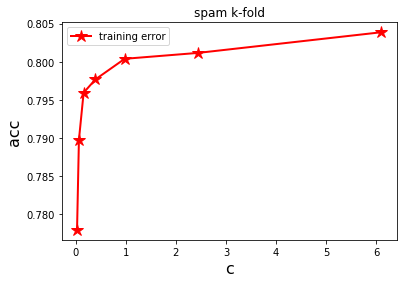

In [22]:
plt.plot(x[1:], y[1:], 'r*-', linewidth=2, markersize=12, label='training error')
plt.gca().legend()
plt.xlabel('c', fontsize=16)
plt.ylabel('acc', fontsize=16)
plt.title('spam k-fold')
plt.show()

## 6. Kaggle

For all three submissions, I tweaked with different C values, based off what  I observed in parts 4 and 5 and then trained on about .25 of the training data to achieve the listed scores.

In [49]:
# MNIST submission
curr_mnist_best

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [63]:
results_to_csv(curr_mnist_best)

In [50]:
# SPAM submission
curr_spam_best

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [64]:
results_to_csv(curr_spam_best)

In [58]:
# CIFAR submission
curr_cifar_best

array([8, 8, 8, ..., 3, 1, 2], dtype=int64)

In [65]:
results_to_csv(curr_cifar_best)